# Lecture Week 4-1

## 0. More on numpy arrays

## I. Probability and $\chi^2$

### &nbsp; &nbsp; &nbsp; &nbsp;  B) Confidence Levels


## II. The curve_fit function and covariance 

## III. Selecting a region of interest in a 2d array.

## Lab: Application of curve_fit




## 0. More on numpy arrays

In [4]:
'''
Three more numpy array methods and an attribute:

.flatten (or .ravel) 

and 

.reshape

and

.transpose (or .T; my guess: @property)


'''
from __future__ import print_function
import numpy as np

# shape = (5, 2)
a = np.ones((5,2))
print(a.shape)
print('a:\n', a)

a_flat = a.flatten()
a_flatt = a.ravel()

print('a_flat:', a_flat)
print('a_flatt:', a_flatt)

a_reshaped = a_flat.reshape(shape)
print('a_reshaped:\n', a_reshaped)

print('a transposed:\n', a.T)
print('a transposed:\n', a.transpose())

(5, 2)
a:
 [[ 1.  1.]
 [ 1.  1.]
 [ 1.  1.]
 [ 1.  1.]
 [ 1.  1.]]
a_flat: [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
a_flatt: [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
a_reshaped:
 [[ 1.  1.]
 [ 1.  1.]
 [ 1.  1.]
 [ 1.  1.]
 [ 1.  1.]]
a transposed:
 [[ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]]
a transposed:
 [[ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]]


## I.B) Probability and $\chi^2$:  Confidence Levels

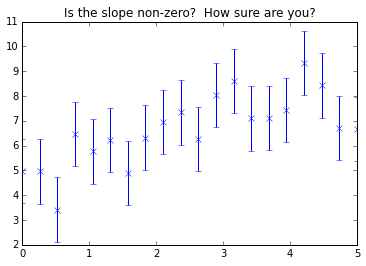

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def gen_lin_data(m_true, b_true, x_min, x_max, sig, N = 20):
    x = np.linspace(x_min, x_max, N)
    return x, m_true * x + b_true + np.random.randn(x.shape[0]) * sig

m_true, b_true = 0.7, 5.
sig = 1.3
x, y = gen_lin_data(m_true, b_true, 0., 5., sig)
plt.errorbar(x, y, yerr = sig, fmt = 'x')
plt.title('Is the slope non-zero?  How sure are you?')
plt.show()


In [6]:
def compute_cdf(P):
    """
        Input: probability distribution (PDF)
        Returns: CDF
        
        Adopted from: 
        
        https://jakevdp.github.io/blog/2014/06/14/frequentism-and-bayesianism-4-bayesian-in-python/
    """
    
    # save the original shape
    shape_orig = P.shape
    # this flattens the array.
    P = P.ravel()   
    
    # obtain the indices to sort and unsort the flattened array
    # i_sort will sort L in descending order
    i_sort = np.argsort(P)[::-1]
    i_unsort = np.argsort(i_sort)
    
    P_cumsum = P[i_sort].cumsum()
    # normalization
    P_cumsum /= P_cumsum[-1]
    
    return P_cumsum[i_unsort].reshape(shape_orig)



## Example: Fitting a straight line to data.

The minimum reduced chi2:0.5994.
The best-fit slope and intercept for the simulated data are m = 0.6430 and b = 5.0633.
(The input values are m_true = 0.7000 and b_true = 5.000000).


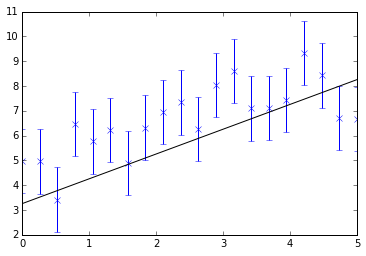

In [7]:

%matplotlib inline

'''
QUESTION: IS THE TEMPERATURE RISING?

Use Grid search.  

There are more efficient ways of doing this. But this way makes every step clear.

'''

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

def f(x, m, b):
    return m*x + b

# Decide on grid search range
m_wid = 1.5
b_wid = 5.

m_start, m_end = m_true - m_wid, m_true + m_wid
b_start, b_end = b_true - b_wid, b_true + b_wid

m_steps = 80
b_steps = 80

m_arr = np.linspace(m_start, m_end, m_steps)
b_arr = np.linspace(b_start, b_end, b_steps)

# initialize chi2_2d
chi2_2d = np.zeros((m_steps, b_steps))

chi2_min = 1e6
for i, m in enumerate(m_arr):
    for j, b in enumerate(b_arr):
        chi2 = ((y - f(x, m, b))**2/sig**2).sum()
        if chi2 < chi2_min:
            chi2_min = chi2
            m_best = m
            b_best = b
        chi2_2d[i, j] = chi2
            
DOF = len(x) - 2
print('The minimum reduced chi2:{:.4f}.'.format(chi2_min/DOF))
print('The best-fit slope and intercept for the simulated data are \
m = {:.4f} and b = {:.4f}.'.format(m_best, b_best))
print('(The input values are m_true = {:.4f} and b_true = {:4f}).'.format(m_true, b_true))

plt.errorbar(x, y, yerr = sig, fmt = 'x')
plt.plot(x, f(m_best, b_best, x), 'k-')
plt.show()



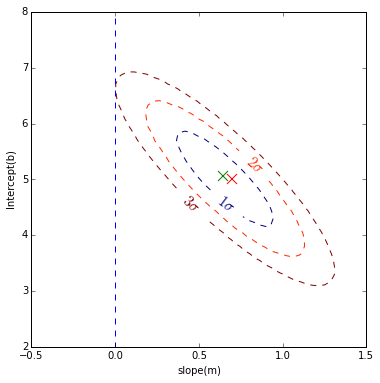

In [12]:
'''Calculate PDF, CDF and plot confidence levels'''

# Calculate probabilty
P = np.exp(-(chi2_2d-chi2_min)/2)
# Normalize probability
P = P/P.sum()

CDF = compute_cdf(P)

sig1, sig2, sig3 = 0.683, 0.955, 0.997
contour_levels = [sig1, sig2, sig3]
extent = [m_arr[0], m_arr[-1], b_arr[0], b_arr[-1] ]

fig = plt.figure(figsize = (6, 6))
cs = plt.contour(CDF.T, levels=contour_levels, linestyles=['--','--','--'], extent = extent)

# If you want to be fancy: latex for your plots!
fmtdict = {sig1:r'$1\sigma$', sig2:r'$2\sigma$', sig3:r'$3\sigma$'}
plt.clabel(cs, fmt=fmtdict, inline=True, fontsize=15)

plt.scatter(m_true, b_true, marker = 'x', facecolor = 'r', s = 100)
plt.scatter(m_best, b_best, marker = 'x', facecolor = 'g', s = 100)
plt.plot([0, 0], [b_arr[0], b_arr[-1]], '--')

plt.xlim(-0.5, 1.5)
plt.ylim(2, 8)
plt.xlabel('slope(m)')
plt.ylabel('Intercept(b)')
plt.show()

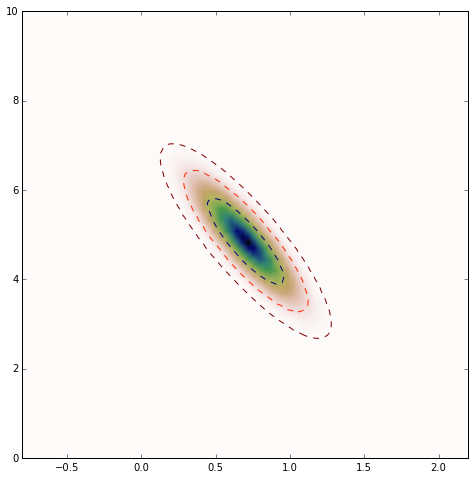

In [22]:
'''Another way to visualize CDF'''

# pyplot.imshow and 3D plot

fig, ax = plt.subplots(figsize = (8, 8))

# Just as for the contour, we need to specify the keyword argument, extent.
plt.imshow(CDF, extent = extent,  origin = 'lower')  # this doesn't look right

# We need to flip the first axis of CDF
plt.imshow(CDF[::-1, :], extent = extent, cmap = plt.cm.gist_earth)

# Overlay with contours
CS = plt.contour(CDF, linestyles=['--','--','--'], levels=contour_levels, extent = extent)

# specify aspect ratio

ax.set_aspect(0.3) # you may also use am.imshow(..., aspect="auto") to restore the aspect ratio
plt.show()

Best-fit m and b, respectively: 0.656 5.011
1 sigma error on best-fit m and b, respectively: 0.148 0.434
The coeffs array:
 [ 0.65603377  5.01060366]
And the covariance matrix:
 [[ 0.02197823 -0.05494558]
 [-0.05494558  0.18797173]]


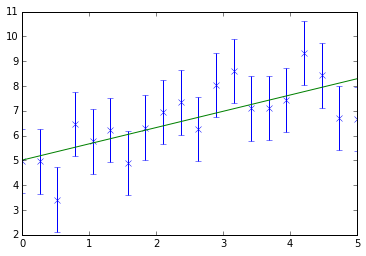

In [23]:
# scipy.optimize.curve_fit

from scipy.optimize import curve_fit

# coeffs, cov = curve_fit(f, x, y)
# give it a little help:
coeffs, cov = curve_fit(f, x, y, p0 = [.5, 4.])

# coeffs gives the best-fit m and b.
m_best = coeffs[0]
b_best = coeffs[1]
print('Best-fit m and b, respectively: {:.3f} {:.3f}'.format(m_best, b_best))

# The diagonal elements of the covariance matrix are the variances of the two fitting parameters.
m_sig = np.sqrt(cov[0, 0])
b_sig = np.sqrt(cov[1, 1])
print('1 sigma error on best-fit m and b, respectively: {:.3f} {:.3f}'.format(m_sig, b_sig))

print('The coeffs array:\n', coeffs)
print('And the covariance matrix:\n', cov)
plt.errorbar(x, y, yerr = sig, fmt = 'x')
plt.plot(x, f(x, m_best, b_best ))
plt.show()

## How about contours based on curve_fit?

In [24]:
'''
First let's create (x, y) pairs for 2d grid

'''

# xx: x values for a 2d grid; yy: y values for a 2d grid;
# so both xx and yy are 2d arrays.
xx, yy = np.mgrid[1:5:1, 11:15:1]

# pairing each value in xx with the corresponding value in yy ,
# thus creating a grid of coordinates.
# E.g., if you fix xx value at 1, there are five yy values: 1, 2, 3, 4. 
xy = np.dstack((xx, yy))
print(xy)


[[[ 1 11]
  [ 1 12]
  [ 1 13]
  [ 1 14]]

 [[ 2 11]
  [ 2 12]
  [ 2 13]
  [ 2 14]]

 [[ 3 11]
  [ 3 12]
  [ 3 13]
  [ 3 14]]

 [[ 4 11]
  [ 4 12]
  [ 4 13]
  [ 4 14]]]


[ 0.65603377  5.01060366]
[[ 0.02197823 -0.05494558]
 [-0.05494558  0.18797173]]
Best-fit m and b, respectively: 0.810 2.238
1 sigma error on m_best and b_best, respectively: 0.148 0.434


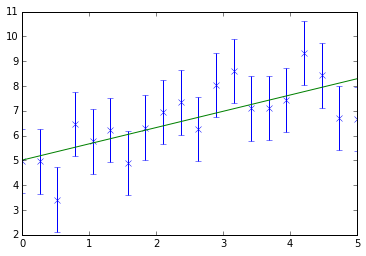

In [25]:
'''
Find best-fit m and b using scipy.optimize.curve_fit
'''

from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal


#coeffs, cov = curve_fit(f, x, y)
# give it a little help:
coeffs, cov = curve_fit(f, x, y, p0 = [.5, 4.])
m_best = coeffs[0]
b_best = coeffs[1]
m_sig = cov[0, 0]
b_sig = cov[1, 1]
print(coeffs)
print(cov)
print('Best-fit m and b, respectively: {:.3f} {:.3f}'.format(np.sqrt(m_best), np.sqrt(b_best)))
print('1 sigma error on m_best and b_best, respectively: {:.3f} {:.3f}'.format(np.sqrt(m_sig), np.sqrt(b_sig)))
plt.errorbar(x, y, yerr = sig, fmt = 'x')
plt.plot(x, f(x, m_best, b_best ))


plt.show()

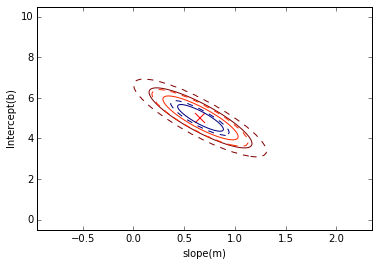

In [29]:
import matplotlib.pyplot as plt
# Note: new import!
from scipy.stats import multivariate_normal

xx, yy = np.mgrid[m_start:m_end:0.01, b_start:b_end:0.01]

# Create a grid of 2d coordinates 
xy = np.dstack((xx, yy))

# create a 2d Gaussian according to the best-fit (m, b) and the covariance matrix.
gauss2d = multivariate_normal(coeffs, cov)
# find probability
P = gauss2d.pdf(xy)
# calculate CDF
CDF_cf = compute_cdf(P)

# plotting
plt.figure()
plt.contour(CDF_cf.T, extent = extent, levels = contour_levels)

# how do the contours compare with the ones we found with grid search?
plt.contour(CDF.T, extent = extent, levels = contour_levels, linestyles=['--','--','--'])
plt.scatter(coeffs[0], coeffs[1], marker = 'x', facecolor = 'r', s = 100)
plt.xlabel('slope(m)')
plt.ylabel('Intercept(b)')

plt.show()

## How to select 2D region of interest

In [ ]:
'''
Given:

    rows = np.linspace(0, 4, 5)
    cols = np.linspace(0, 4, 5)

    arr2d = np.random.randn(5, 5)

Select the elements in 3rd and 4th columns and in 2nd and 3rd row
'''

# generate 2d array
rows = np.linspace(0, 4, 5)
cols = np.linspace(0, 4, 5)

arr2d = np.random.randn(5, 5)


In [ ]:
#Select the elements in 3rd and 4th columns and in 2nd and 3rd row


# in the case, idx1 = (rows < 4) * (rows > 1) would NOT work well.
idx1 = np.where( (rows < 4) * (rows > 1))[0]
idx2 = np.where(cols > 2)[0]

print(idx1)
print(idx2)

idx = np.meshgrid(idx1, idx2)

arr2d_cut = arr2d[idx]
print(arr2d)
print(arr2d_cut.shape)
# Note: I have to do a transpose here.
print(arr2d_cut.T)


## Lab Breakout Exercise: CDF and confidence levels

-  ## For data we believe can be fit with $sin(kx + \phi)$, use scipy.optimize.curve_fit do find the best-fit k and phi.

-  ## Plot data together with the model using the best-fit k and phi.
-  ## Based on the best-fit k and phi and the covariance matrix, find the probability distribution (PDF) and then CDF
    Suggestion:

     k\_start, k\_end = k\_best-5\*k_sig, k\_best+5\*k\_sig
     
     phi\_start, phi\_end = phi\_best-5\*phi\_sig, phi\_best+5\*phi\_sig

-  ## Plot 68%, 95%, and 99.7% contours for CDF



In [ ]:
'''The simulation'''
from scipy.constants import pi
x = np.linspace(0, 2*pi, 101)
k = 2.
phi = pi/6.
err = np.cos(x)*0.2
y = np.sin(k*x + phi) + np.random.randn(x.shape[0])*err
plt.plot(x, y)
plt.show()

# End of Week4-1